Do wyznaczenia złożności czasowej algorytmów posłużono się zestawem danych zebranych eksperymentalnie.
Dla każdego wybranego n (tzn. 10,50,100,250,500,1000,2500,5000) program przygotował 5 zestawów plików uzupełnionych liczbami pseudolosowymi spełniającymi założenia wstępne programu ($a_n \le 1000$), a następnie zebrał dane o ilości elementarnych dla danej próbki. Wartości zanotowane znajdują się poniżej. 

In [1]:
#względna ilosc operacji dla algorytmu naiwnego
import numpy as np
import matplotlib.pyplot as plt

nn10=[65,65,65,65,65]
nn50=[1325,1325,2736,1325,1325]
nn100=[26948,14492,12406,10151,10134]
nn250=[525673,385503,495245,520203,621308]
nn500=[6698428,6531100,6467086,6240070,6858158]
nn1000=[83001614,84078739,80531244,84404085,80508906]
nn2500=[2013507364,2037667574,2031707427,2037371345,1999300019]
#czas do wyznaczenia tych wartosci przekracza moja cierpliwosc
nn5000=[]
nn10000=[]

#wzgledna ilosc operacji dla algorytmu optymalnego

no10=[1005,1007,968,1009,1001]
no50=[992,1026,2016,1039,1033]
no100=[2985,3054,3096,2076,3087]
no250=[3249,3240,3240,3225,3246]
no500=[3490,3484,3475,7482,3496]
no1000=[7989,7996,7996,7996,7996]
no2500=[17489,17489,17474,17489,17489]
no5000=[35974,35974,35974,19989,35974]
no10000=[40974,40974,40974,72943,40974]

Z 5 zestawów została wyznaczona średnia i uśrednione wartości stały się wartościami funkcji. 
Argumentami funkcji zostały wartości dla których losowanie miało miejsce (10,50,100,250,500,1000,2500,5000,10000).
Dodatkowo by określić złożoność zastosowana została wielomianowa krzywa dopasowania.

Dla algorytmu optymalnego do 5000 złożoność wydawała się rosnąć liniowo, lecz dane dla 10000 mogą sugerować złożonośc logarytmiczną, wkrada się tutaj bowiem element powtarzalności zbioru (dla 10 000 liczb z przedziału od 0 do 1000 wartością oczekiwaną pojawienia się każdej z nich jest 10, dla zbiorów poniżej 1000 zjawisko nie powinno występować lub mieć znikomy wpływ na algorytm). By doszacować złożoność, należałoby wygenerować liczby zgodnie z jakimś rozkładem np. normalnym i określić to metodą Monte Carlo (liczby pseudolosowe szczególnie w aspekcie powtarzalności zbioru nie są najlepszym zbiorem danych) lub zebrać więcej danych (też dla większych wartości, lecz w obecnej postaci algorytm musiałby ulec zmodyfikowaniu - tablica zliczająca musiałaby zostać zwiększona).

Trudno jest jednoznacznie określić jaki wariant byłby pesymistycznym, teoretycznie zakładając np. zbiór danych typu 1,1,2,4,8,16,32,64,128,254,512 mamy do czynienia z lawinowością i w niej możnaby upatrywać największych problemów, lecz spreparowanie tego typu zestawów testowych nie jest łatwe i wcale nie da się jednoznacznie określić czy jest to najgorszy możliwy przypadek (maksymalna wartość możliwa w zbiorze to 1000 więc lawinowość jest ograniczona), dlatego też zostałem przy losowaniu liczb pseudolosowych.

Gdybym miał określić najgorszy możliwy przypadek to byłby to zbiór który posiada maksymalną wartość 1000 na początku oraz w każdej możliwej iteracji wykonuje operacje sumowania w 2 połowie zbioru (oznacza to zwiększenie obszaru poszukiwań o dwa) aż do maksymalnego rozmiaru zdefiniowanego jako 8128*1000 po którym iterowałoby k krotnie (gdzie k jest skończoną liczbą, niezależną od n a raczej od powtarzalności zbioru) stąd

$T(n)=1000+2000+4000+\ldots+8192000+(k-1)\cdot 8192000= 1000\cdot\frac{1-2^{14}}{1-2}+(k-1)\cdot 8192000
= 16383000+8192000k - 8192000 = 8192000k + 8191000 = O(1)
$

Złożoność stała wynika ze znajomości maksymalnego rozmiaru pliku tzn. n=10000, dla nieznanej wartości trzeba by określić jaki rozmiar musi mieć tablica zliczająca - w ilu krokach musi zejść z n do 1 przy dzieleniu zbioru na 2.

Założenie n może być powyżej 10000 i  $n=2^k$ wtedy by zejść z n do 1 potrzeba $\log_2n$ kroków stąd
$T(n)=1000+2000+4000+\ldots+2^{log_2n}\cdot1000+(k-1)\cdot 2^{log_2n} \cdot 1000= 1000\cdot\frac{1-2^{\log_2n}}{1-2}+(k-1)\cdot2^{log_2n}\cdot1000 =1000n-1000+1000\cdot k \cdot n -1000n = 1000 \cdot k \cdot n - 1000 = O(n)
$


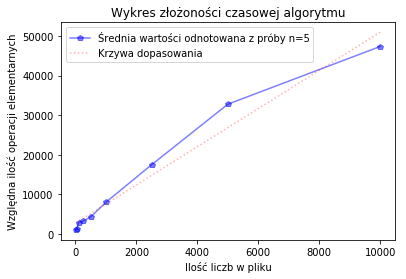

In [3]:
optimal=[np.mean(np.array(no10)),np.mean(np.array(no50)),np.mean(np.array(no100)),np.mean(np.array(no250)),np.mean(np.array(no500)),np.mean(np.array(no1000)),np.mean(np.array(no2500)),np.mean(np.array(no5000)),np.mean(np.array(no10000))]
naive= [np.mean(np.array(nn10)),np.mean(np.array(nn50)),np.mean(np.array(nn100)),np.mean(np.array(nn250)),np.mean(np.array(nn500)),np.mean(np.array(nn1000)),np.mean(np.array(nn2500))]
x=[10,50,100,250,500,1000,2500,5000,10000]
z1=np.polyfit(x,optimal,1)
p_1=np.poly1d(z1)


plt.plot(x,optimal,'bp-', alpha=0.5,label="Średnia wartości odnotowana z próby n=5")
plt.plot(x,p_1(x),'r:',alpha=0.3,label="Krzywa dopasowania")
plt.legend()
plt.title("Wykres złożoności czasowej algorytmu")
plt.xlabel("Ilość liczb w pliku")
plt.ylabel("Względna ilość operacji elementarnych")
plt.show()

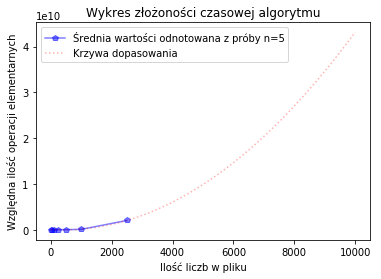

In [4]:
x1=np.linspace(0,10000)
x2=[10,50,100,250,500,1000,2500]
z2=np.polyfit(x2,naive,2)
p_2=np.poly1d(z2)


plt.plot(x2,naive,'bp-', alpha=0.5,label="Średnia wartości odnotowana z próby n=5")
plt.plot(x1,p_2(x1),'r:',alpha=0.3,label="Krzywa dopasowania")
plt.legend()
plt.title("Wykres złożoności czasowej algorytmu")
plt.xlabel("Ilość liczb w pliku")
plt.ylabel("Względna ilość operacji elementarnych")
plt.show()

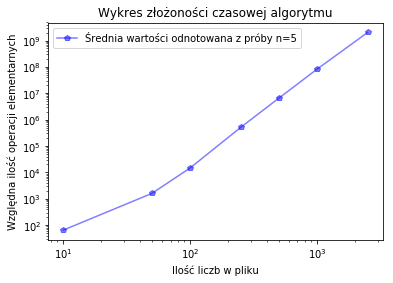

In [9]:
#Wykres złożoności czasowej algorytmu w skali logarytmicznej
plt.plot(x2,naive,'bp-', alpha=0.5,label="Średnia wartości odnotowana z próby n=5")
plt.legend()
plt.title("Wykres złożoności czasowej algorytmu")
plt.xlabel("Ilość liczb w pliku")
plt.ylabel("Względna ilość operacji elementarnych")
plt.yscale("log")
plt.xscale("log")
plt.show()

Bez większej analizy wykresu można określić że $T(n)= \Omega(n^2)$ 